<a href="https://colab.research.google.com/github/khushalvpawar/Repository-name-blinkit-sales-dashboard-/blob/main/Blinkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/blinkit_data.csv')

In [6]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
df.shape

(8523, 12)

In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [9]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [11]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [13]:
df.isnull()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,True,False,False
8519,False,False,False,False,False,False,False,False,False,True,False,False
8520,False,False,False,False,False,False,False,False,False,True,False,False
8521,False,False,False,False,False,False,False,False,False,True,False,False


In [14]:
df.isna().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [19]:
df['Item Weight'].fillna(df['Item Weight'].median(), inplace=True)

/tmp/ipython-input-2865185454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Weight'].fillna(df['Item Weight'].median(), inplace=True)


In [20]:
df.isna().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


In [21]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


## **Total sales by fat content**

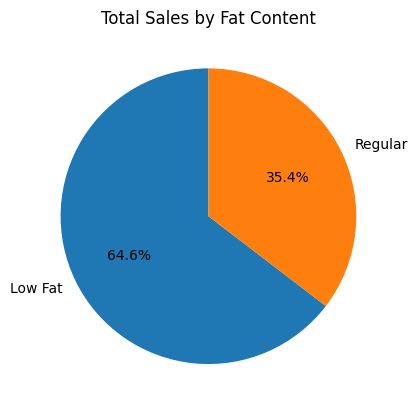

<function matplotlib.pyplot.show(close=None, block=None)>

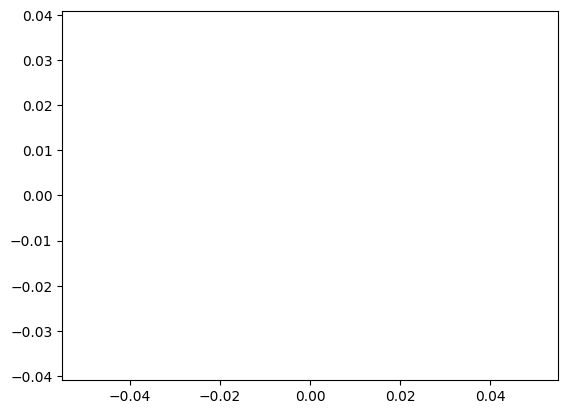

In [24]:
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat_content, labels=sales_by_fat_content.index, autopct='%1.1f%%' , startangle=90)
plt.title('Total Sales by Fat Content')
plt.show()
plt.axis ('equal')
plt.show

## **Total sales by Item type**

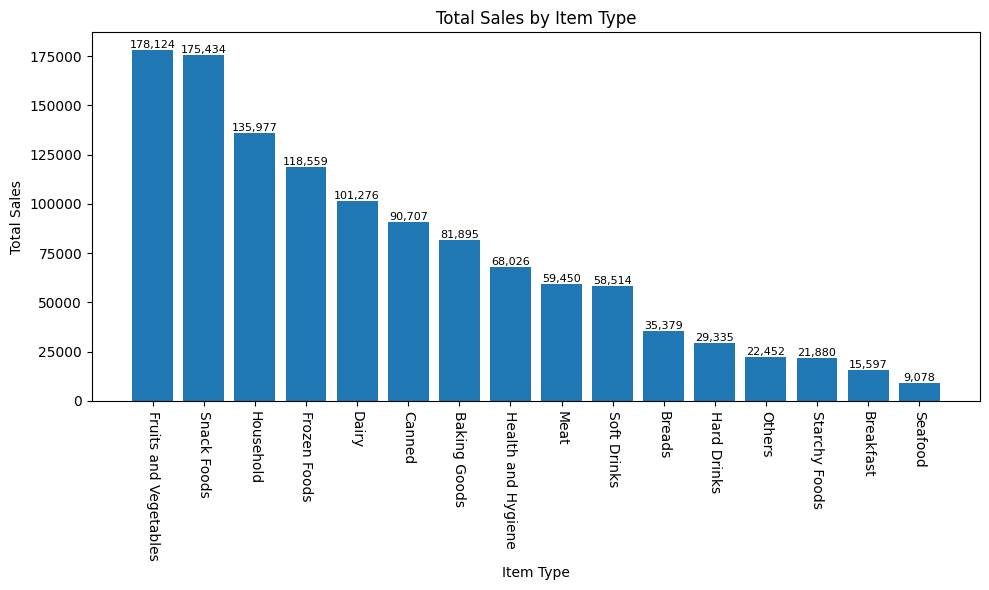

In [28]:

sales_by_type=df.groupby('Item Type') ['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars=plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
      f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

## **Fat content by outlet by total sales**

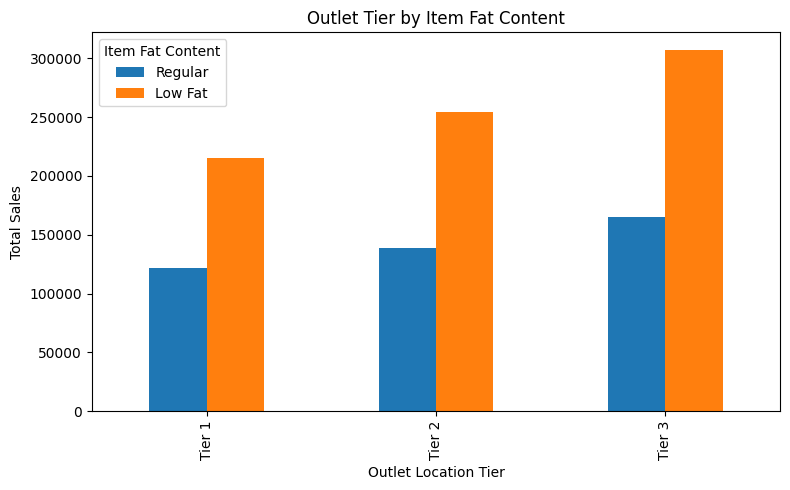

In [29]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content']) ['Sales'].sum().unstack()
grouped = grouped [['Regular', 'Low Fat']]
ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

## **Total sales outlet by eastablishment**

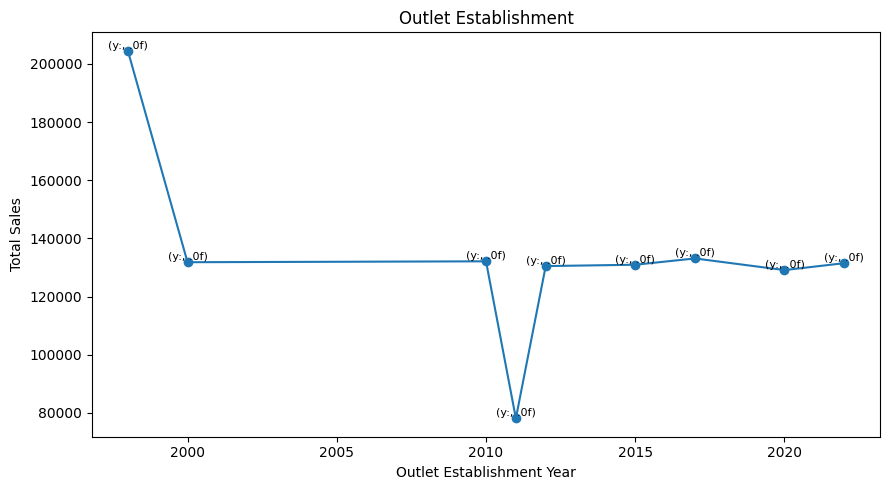

In [30]:
sales_by_year = df.groupby('Outlet Establishment Year') ['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
for x, y in zip(sales_by_year.index, sales_by_year.values):
   plt.text(x, y, f'(y:, .0f)', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

## **Sales by outlet Size**


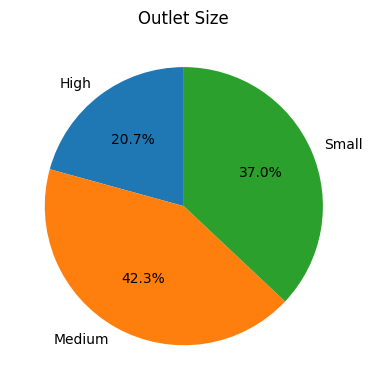

In [32]:
sales_by_size = df.groupby('Outlet Size') ['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

## **Sales by outlet location**

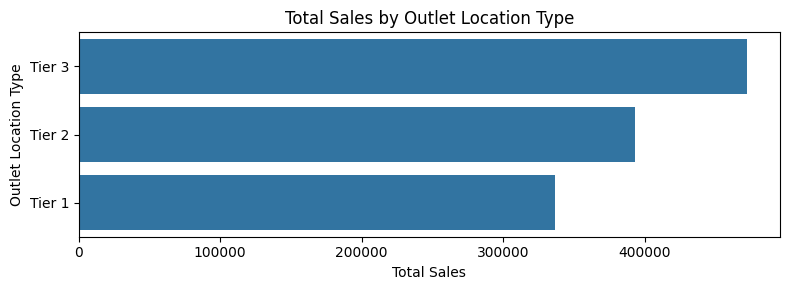

In [36]:
sales_by_location= df.groupby('Outlet Location Type') ['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)
plt.figure(figsize=(8, 3)) # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout() # Ensures Layout fits without scroll
plt.show()